Manually determine the following integral using Monte Carlo Integration:

$$
f(x) = 1.5 x^2 - 2x + 1
$$
$$
I = \int_0^2 f(x) \;dx
$$

* (a) Use a constant probability distribution (PDF) to draw samples
* (b) The function $g(x)=x$ is a linear approximation of the original function determined by the least square optimization. Derive a PDF from $g$ and draw your samples from it.

For this $20$ "random" numbers in the interval $[0 ... 1]$ are given.

Generate the respective CDF for the two PDFs and use them to draw samples. Explain why the convergence in (b) is not better than in (a).

I_a = 1.678248334
I_b = 1.70868875527


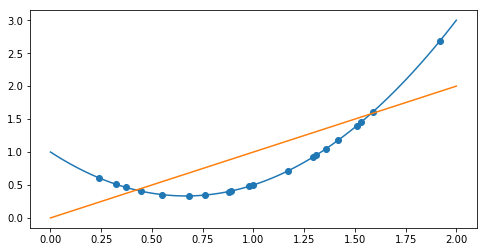

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

random_numbers = np.array([0.4387, 0.7655, 0.1869, 0.4456, 0.7094,
             0.2760, 0.6551, 0.1190, 0.9597, 0.5853,
             0.3816, 0.7952, 0.4898, 0.6463, 0.7547,
             0.6797, 0.1626, 0.4984, 0.3404, 0.2238])

f = lambda x: 1.5 * x**2 - 2 * x + 1
g = lambda x: x

I_a = 1/20 * np.sum(2 * [f(2*x) for x in random_numbers])
print('I_a = ' + str(I_a))

I_b = 1/20 * np.sum([(f(2 * sqrt(x)))/sqrt(x) for x in random_numbers])
print('I_b = ' + str(I_b))

gz = lambda x: x / 2

samples = [f(v) for v in random_numbers * 2]

x = np.linspace(0, 2, 100)

fig = plt.figure(figsize=(8, 4))
plt.plot(x, [f(v) for v in x])
plt.plot(x, [g(v) for v in x])
plt.scatter(random_numbers * 2, samples)
plt.show()

The correct value of the integral is 
$$\int_0^2 f(x) \;dx = 2$$

Assuming $\zeta, Z$ be random variables that are uniformly distributed on the range $[0,1]$ and $[0,2]$ respectively.

**(a)**
To sample values for $Z$ from $\zeta$ we simply have to

$$Z = 2\zeta = P_Z^{-1}(\zeta)$$

using the Inversion Method. We further get:

$$P_Z(z) = \frac{1}{2}z \ \ \ \ \ \ \ \ \ \ \ p_z(z)=\frac{1}{2}$$

From this follows that:

$$
I =\mathbb{E} \biggr[ \frac{f}{p_z} \biggr] \approx
\hat{f} = \frac{1}{n} \sum_{i=1}^n \frac{f(z_i)}{p_z(z_i)} = \frac{1}{n}\sum_{i=1}^n 2f(2\zeta_i)
$$

Given the random values from the cheet we get:
$I = 1.678248334$

**(b)** Given $g(x)=x$ we get:
$$p_Z(z)=\frac{1}{2} \ \ \ \ \ \ \ \ \ \ \ \ P_Z(z)=\frac{1}{4}z^2$$

Using Inversion Method, given that $P_Z^{-1}(\zeta)=2\sqrt{\zeta}$ we get:

$$Z = P_Z^{-1}(\zeta)=2\sqrt{\zeta}$$

$$
I =\mathbb{E} \biggr[ \frac{f}{p_z} \biggr] \approx
\hat{f} = \frac{1}{n} \sum_{i=1}^n \frac{f(z_i)}{p_z(z_i)} = \frac{1}{n}\sum_{i=1}^n \frac{f(2\sqrt{\zeta_i})}{\sqrt{\zeta_i}}
$$

With this, we get: $I = 1.70868875527$